In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [192]:
ap_weights = np.array([105,160,213,267,387,508,629,750,872,993,1117,1238,1292,1347,1401])

## TEST 1
s1p1times = np.array([0,26,47,68,90,112,132,151,171,189,211,230,252,271,291])
s1p2times = np.array([0,25,48,70,94,115,135,157,176,196,214,233,249,267,286])
s1p3times = np.array([0,25,48,68,88,108,128,149,169,187,204,223,241,260,280])
s1p4times = np.array([0,20,42,62,81,101,121,142,160,182,198,225,245,265,285])
s1p5times = np.array([0,20,46,69,91,113,134,155,175,193,211,228,245,264,282])

s2p1times = np.array([0,20,44,64,85,103,122,142,162,178,201,221,240,260,276])
s2p2times = np.array([0,20,40,62,85,109,132,151,172,215,237,254,273,295,313])
s2p3times = np.array([0,25,46,66,85,107,129,148,168,187,209,233,253,270,290])
s2p4times = np.array([1,19,42,63,103,123,141,161,178,197,213,231,250,268,286])
s2p5times = np.array([1,21,46,64,84,108,127,205,223,244,262,280,296,317,333])

s3p1times = np.array([1,23,49,75,96,115,139,158,184,202,223,246,268,288,305])
s3p2times = np.array([0,39,63,84,106,127,149,169,190,210,231,251,272,289,309])
s3p3times = np.array([0,27,49,72,95,115,140,160,182,201,221,243,262,284,306])
s3p4times = np.array([0,22,41,61,78,103,127,144,163,181,200,218,237,254,273])
s3p5times = np.array([0,20,40,57,77,97,117,137,155,172,190,207,225,241,260])

#Senso4 4 not testing p1 and p5
s4p2times = np.array([1,25,44,68,93,115,136,154,173,191,210,230,247,267,284])
s4p3times = np.array([0,20,46,61,85,113,133,152,171,189,211,231,250,270,290])
s4p4times = np.array([0,25,46,65,84,110,127,147,167,186,205,224,242,261,281])

s5p1times = np.array([0,25,49,70,94,116,139,160,183,202,221,241,261,282,296])
s5p2times = np.array([0,23,52,79,98,120,138,157,178,202,222,242,261,284,301])
s5p3times = np.array([0,29,50,69,95,114,132,152,171,189,209,226,245,263,279])
s5p4times = np.array([1,33,52,70,92,111,131,148,173,190,206,226,246,266,284])
s5p5times = np.array([0,18,35,52,71,92,110,127,145,162,184,206,243,261,280])

s6p1times = np.array([1,23,42,60,79,99,117,136,153,173,190,209,229,249,270])
s6p2times = np.array([0,24,46,65,85,103,123,142,161,183,209,230,250,271,290])
s6p3times = np.array([0,28,50,70,91,111,130,152,172,191,209,229,248,265,285])
s6p4times = np.array([1,19,40,59,83,99,117,137,157,174,193,211,230,250,267])
s6p5times = np.array([1,23,43,60,90,111,131,151,168,186,204,224,243,261,278])

s7p1times = np.array([0,20,38,56,74,93,113,130,148,166,183,204,223,241,260])
s7p2times = np.array([0,22,40,60,79,97,114,133,151,169,186,206,227,245,265])
s7p3times = np.array([4,28,49,68,90,110,129,149,167,187,206,223,236,255,273])
s7p4times = np.array([1,23,45,67,87,107,128,148,168,188,206,225,245,263,282])
s7p5times = np.array([0,20,43,64,84,102,122,141,161,180,200,219,239,259,280])

In [193]:
def matrix(fileName, sensorNum, ptimes, weights):

    sxpx = pd.read_csv(fileName)
    counter = np.trunc(np.array(sxpx['time'].values))
    pressures = np.array(sxpx[sensorNum].values)*10 ##THIS IS JUST FOR THIS SET OF DATA BC I CONVERTED WRONG

    idx = np.ravel([np.where(counter == a) for a in ptimes]) #add something if number doesn't show up
    #print(idx)
    #REMEMBER TO CHECK IDX THAT IT ALL CORRELATES TO REAL VALUES
    #in case I accidentally rounded
    #in future have code detect where weight changes are made


    #averages and SDs
    averages = np.zeros_like(idx, float)
    stdevs = np.zeros_like(idx, float)

    full = np.zeros((10,len(idx)))

    for b in np.arange(0,len(idx)):
        i = np.arange(idx[b],idx[b]+10)
        
        full[:,b] = pressures[i]

        averages[b] = np.mean(pressures[i])
        stdevs[b] = np.std(pressures[i])
    stdmatrix = np.hstack(stdevs)
    avgmatrix = np.column_stack((weights,averages))
    return avgmatrix, stdmatrix


In [194]:
def makePlots(data, std, sensorNum):
    #Data must be in order from 1=>5
    #SensorNum must be an Int

    fig, ax = plt.subplots(3,2,figsize=(15,15))
    axs = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]

    axs[0].set_title("Sensor " +str(sensorNum))
    
    opt = ['red','green','blue','darkorange','violet','skyblue','pink']
    names = ['Position1', 'Position2', 'Position3','Position4','Position5']

    m = np.zeros(5)
    b = np.zeros(5)

    for d in np.arange(0,len(data)):
        e = data[d]
        x=e[:,0]
        y=e[:,1]

        #line of best fit
        m[d], b[d] = np.polyfit(x,y,deg=1)
        for i in [0,d+1]:
            axs[i].set_xlabel("Applied Weights (g)")
            axs[i].set_ylabel("Recorded Pressure (kPa)")
            axs[i].scatter(x,y, c=opt[d], label = names[d])
            axs[i].plot(x,m[d]*x+b[d],c=opt[d],label=f"{m[d]:.2f}*x={b[d]:.2f}")
            axs[i].errorbar(x,y,std[d],fmt='o', color=opt[d])

        axs[d+1].legend()


    plt.show()
    return m,b

In [195]:
def makePlots3(data, std, sensorNum):
    #Data must be in order from 1=>5
    #SensorNum must be an Int

    fig, ax = plt.subplots(2,2,figsize=(15,15))
    axs = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]

    axs[0].set_title("Sensor " +str(sensorNum))
    
    opt = ['green','blue','darkorange','violet','skyblue','pink']
    names = ['Position2', 'Position3','Position4','Position5']
    
    m = np.zeros(5)
    b = np.zeros(5)

    for d in np.arange(0,len(data)):
        e = data[d]
        x=e[:,0]
        y=e[:,1]

        

        #line of best fit
        m[d+1], b[d+1] = np.polyfit(x,y,deg=1)
        for i in [0,d+1]:
            axs[i].set_xlabel("Applied Weights (g)")
            axs[i].set_ylabel("Recorded Pressure (kPa)")
            axs[i].scatter(x,y, c=opt[d], label = names[d])
            axs[i].plot(x,m[d+1]*x+b[d+1],c=opt[d],label=f"{m[d+1]:.2f}*x={b[d+1]:.2f}")
            axs[i].errorbar(x,y,std[d],fmt='o', color=opt[d])

        axs[d+1].legend()


    plt.show()
    return m,b

In [196]:
s1p1, stds1p1 = matrix('sensor1_position1_T1.csv', 's1',s1p1times,ap_weights)
s1p2, stds1p2 = matrix('sensor1_position2_T1.csv', 's1',s1p2times,ap_weights)
s1p3, stds1p3 = matrix('sensor1_position3_T1.csv', 's1',s1p3times,ap_weights)
s1p4, stds1p4 = matrix('sensor1_position4_T1.csv', 's1',s1p4times,ap_weights)
s1p5, stds1p5 = matrix('sensor1_position5_T1.csv', 's1',s1p5times,ap_weights)

s2p1, stds2p1 = matrix('sensor2_position1_T1.csv', 's2',s2p1times,ap_weights)
s2p2, stds2p2 = matrix('sensor2_position2_T1.csv', 's2',s2p2times,ap_weights)
s2p3, stds2p3 = matrix('sensor2_position3_T1.csv', 's2',s2p3times,ap_weights)
s2p4, stds2p4 = matrix('sensor2_position4_T1.csv', 's2',s2p4times,ap_weights)
s2p5, stds2p5 = matrix('sensor2_position5_T1.csv', 's2',s2p5times,ap_weights)

s3p1, stds3p1 = matrix('sensor3_position1_T1.csv', 's3',s3p1times,ap_weights)
s3p2, stds3p2 = matrix('sensor3_position2_T1.csv', 's3',s3p2times,ap_weights)
s3p3, stds3p3 = matrix('sensor3_position3_T1.csv', 's3',s3p3times,ap_weights)
s3p4, stds3p4 = matrix('sensor3_position4_T1.csv', 's3',s3p4times,ap_weights)
s3p5, stds3p5 = matrix('sensor3_position5_T1.csv', 's3',s3p5times,ap_weights)

s4p2, stds4p2 = matrix('sensor4_position2_T1.csv', 's4',s4p2times,ap_weights)
s4p3, stds4p3 = matrix('sensor4_position3_T1.csv', 's4',s4p3times,ap_weights)
s4p4, stds4p4 = matrix('sensor4_position4_T1.csv', 's4',s4p4times,ap_weights)

s5p1, stds5p1 = matrix('sensor5_position1_T1.csv', 's5',s5p1times,ap_weights)
s5p2, stds5p2 = matrix('sensor5_position2_T1.csv', 's5',s5p2times,ap_weights)
s5p3, stds5p3 = matrix('sensor5_position3_T1.csv', 's5',s5p3times,ap_weights)
s5p4, stds5p4 = matrix('sensor5_position4_T1.csv', 's5',s5p4times,ap_weights)
s5p5, stds5p5 = matrix('sensor5_position5_T1.csv', 's5',s5p5times,ap_weights)

s6p1, stds6p1 = matrix('sensor6_position1_T1.csv', 's6',s6p1times,ap_weights)
s6p2, stds6p2 = matrix('sensor6_position2_T1.csv', 's6',s6p2times,ap_weights)
s6p3, stds6p3 = matrix('sensor6_position3_T1.csv', 's6',s6p3times,ap_weights)
s6p4, stds6p4 = matrix('sensor6_position4_T1.csv', 's6',s6p4times,ap_weights)
s6p5, stds6p5 = matrix('sensor6_position5_T1.csv', 's6',s6p5times,ap_weights)

s7p1, stds7p1 = matrix('sensor7_position1_T1.csv', 's7',s7p1times,ap_weights)
s7p2, stds7p2 = matrix('sensor7_position2_T1.csv', 's7',s7p2times,ap_weights)
s7p3, stds7p3 = matrix('sensor7_position3_T1.csv', 's7',s7p3times,ap_weights)
s7p4, stds7p4 = matrix('sensor7_position4_T1.csv', 's7',s7p4times,ap_weights)
s7p5, stds7p5 = matrix('sensor7_position5_T1.csv', 's7',s7p5times,ap_weights)

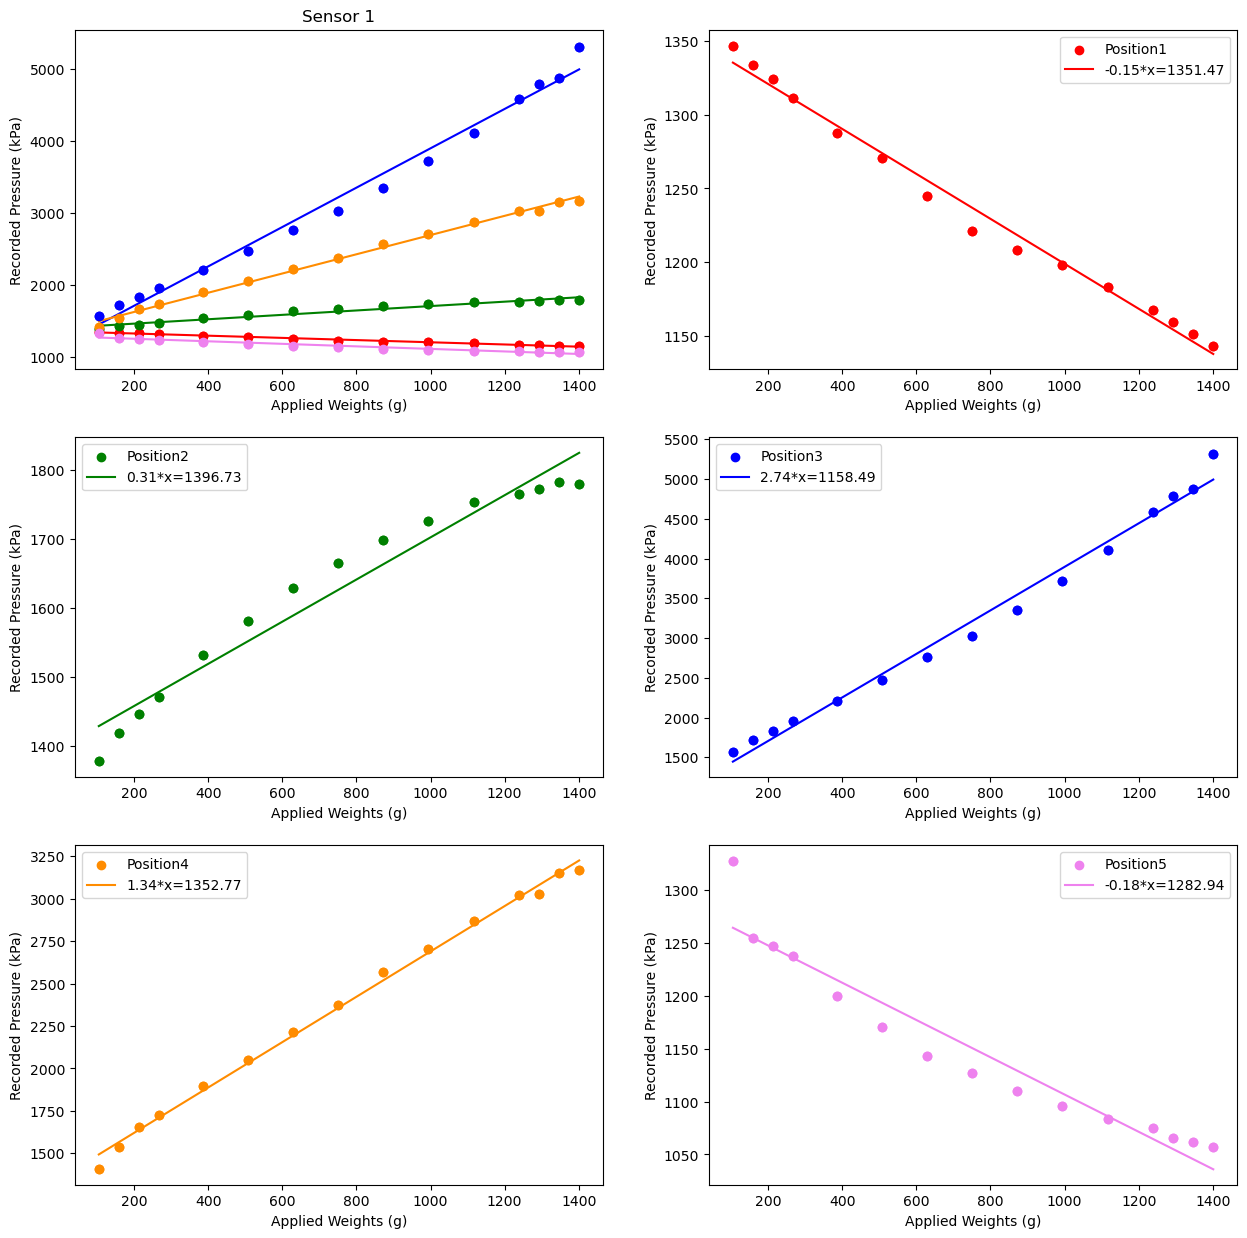

In [197]:
plottingplans1 = [s1p1,s1p2,s1p3,s1p4,s1p5]
stdev1 = [stds1p1,stds1p2,stds1p3,stds1p4,stds1p5]
m1,b1 = makePlots(plottingplans1,stdev1,1)

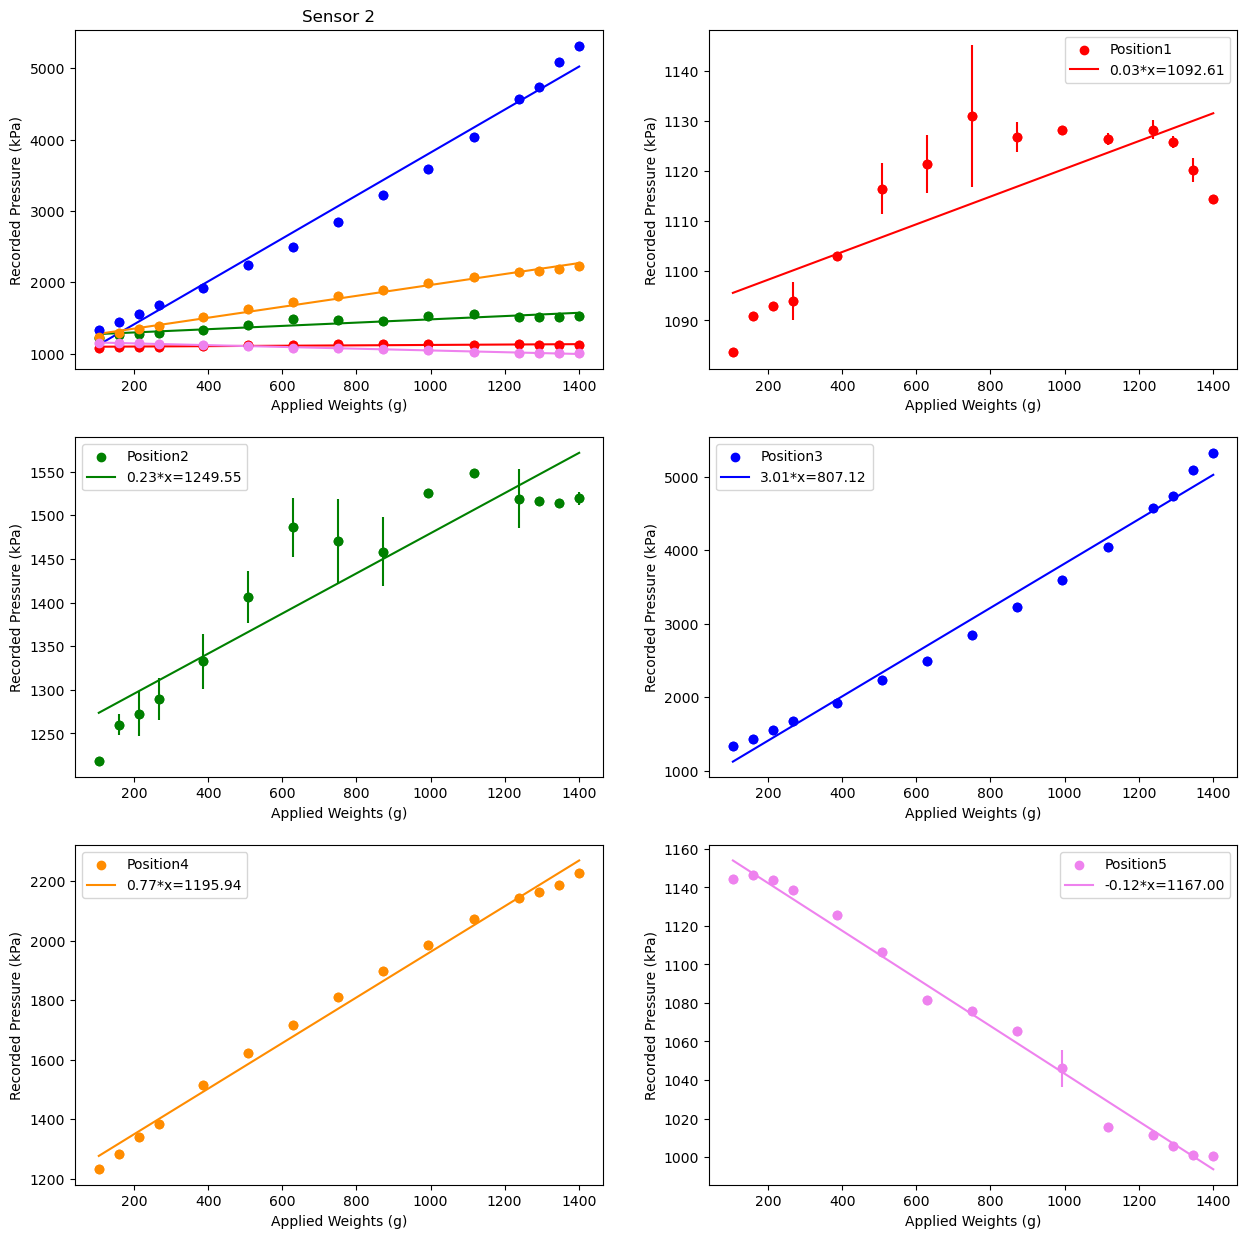

In [198]:
plottingplans2 = [s2p1,s2p2,s2p3,s2p4,s2p5]
stdev2 = [stds2p1,stds2p2,stds2p3,stds2p4,stds2p5]
m2,b2 = makePlots(plottingplans2,stdev2,2)

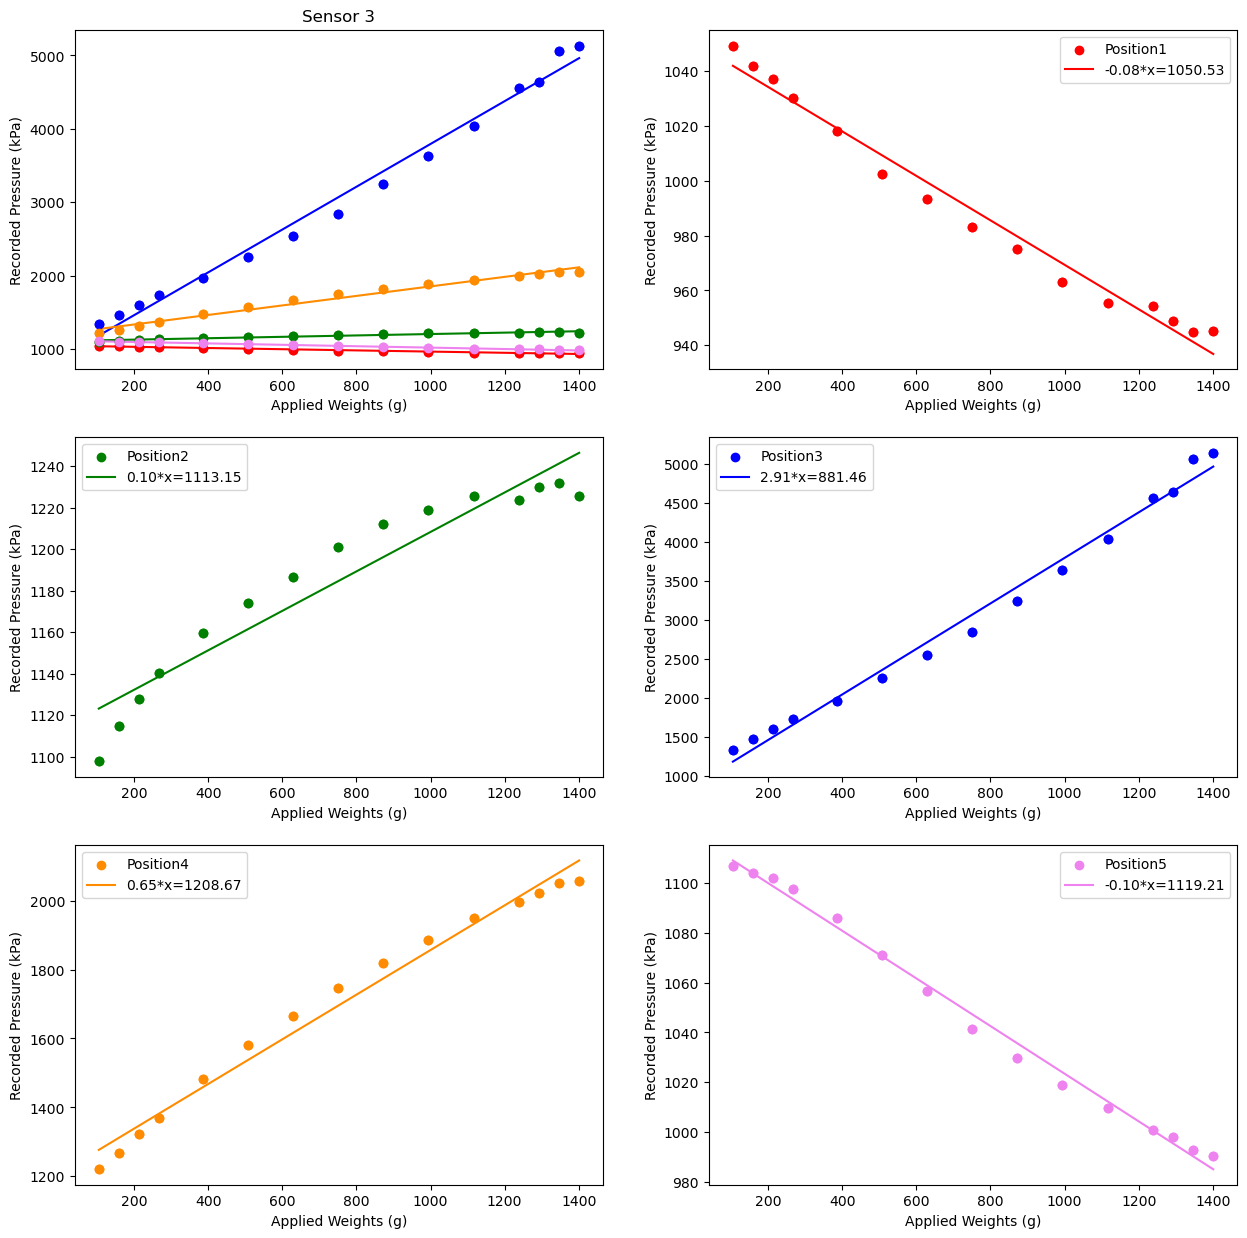

In [199]:
plottingplans3 = [s3p1,s3p2,s3p3,s3p4,s3p5]
stdev3 = [stds3p1,stds3p2,stds3p3,stds3p4,stds3p5]
m3,b3 = makePlots(plottingplans3,stdev3,3)

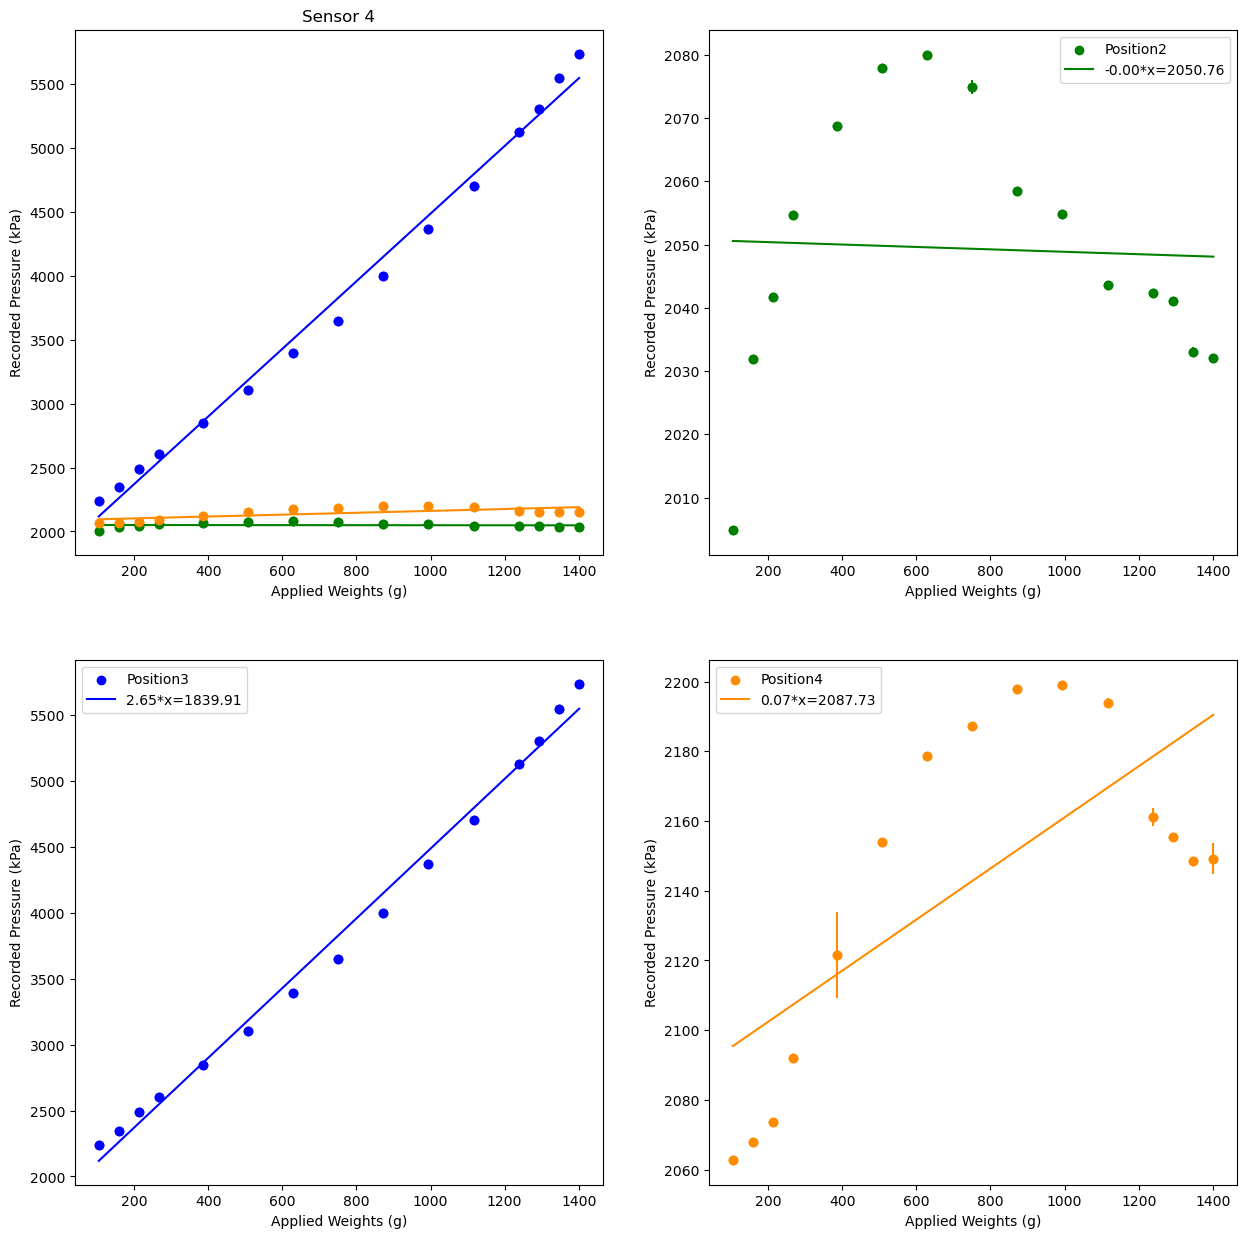

In [200]:
plottingplans4 = [s4p2,s4p3,s4p4]
stdev4 = [stds4p2,stds4p3,stds4p4]
m4,b4 = makePlots3(plottingplans4,stdev4,4)

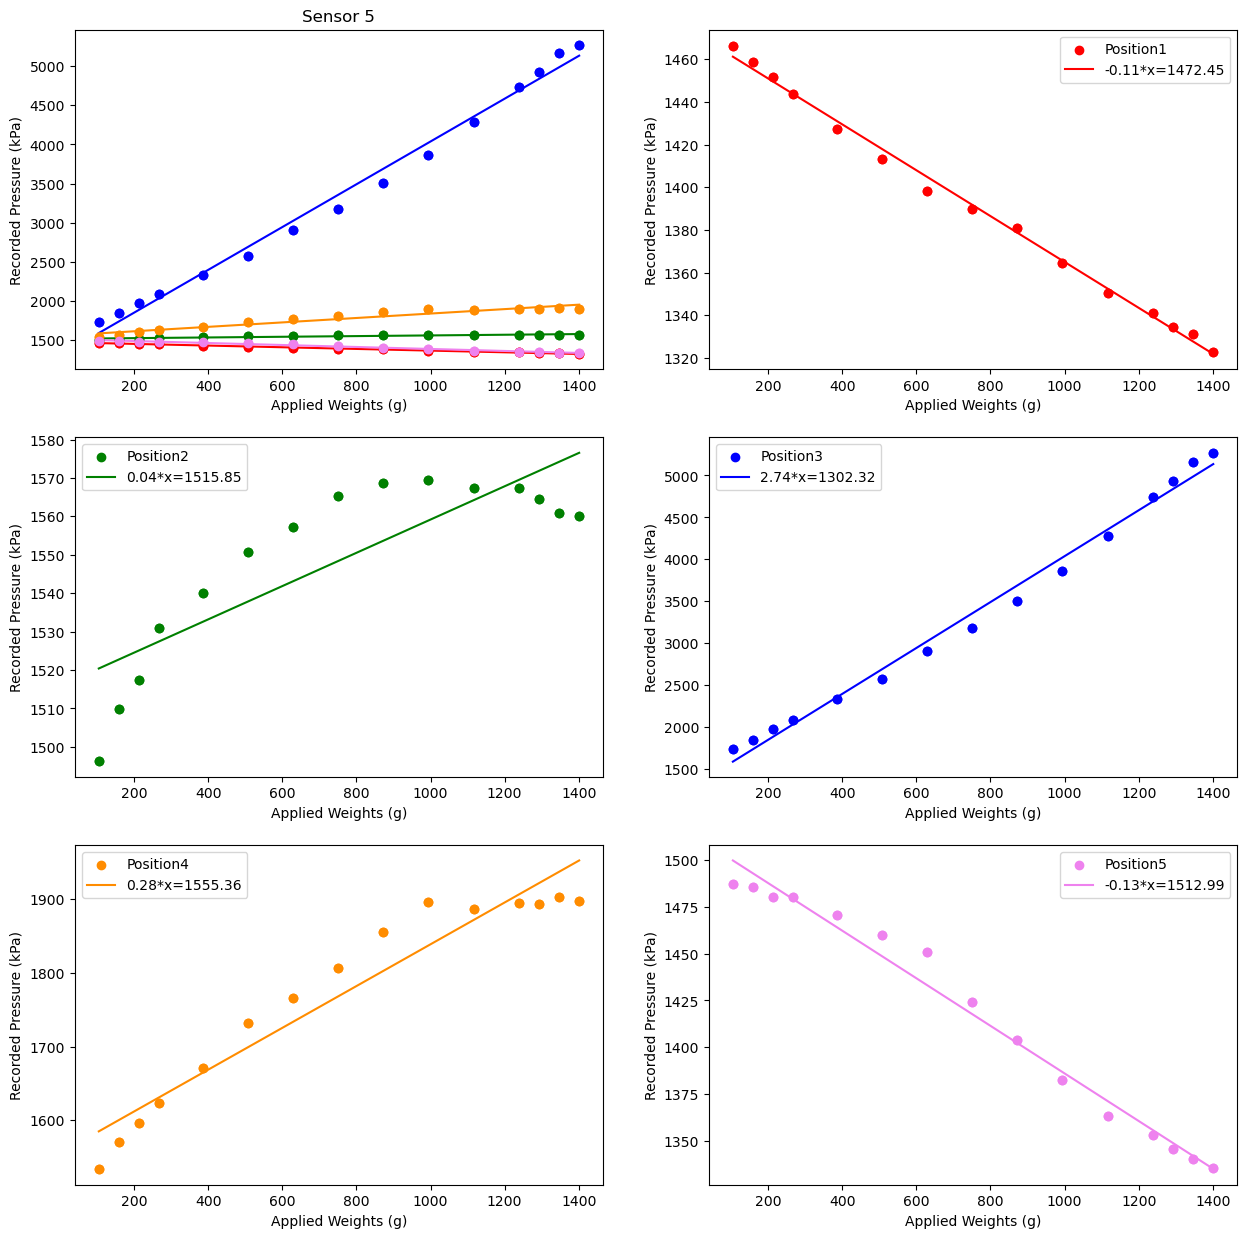

In [201]:
plottingplans5 = [s5p1,s5p2,s5p3,s5p4,s5p5]
stdev5 = [stds5p1,stds5p2,stds5p3,stds5p4,stds5p5]
m5,b5 = makePlots(plottingplans5,stdev5,5)

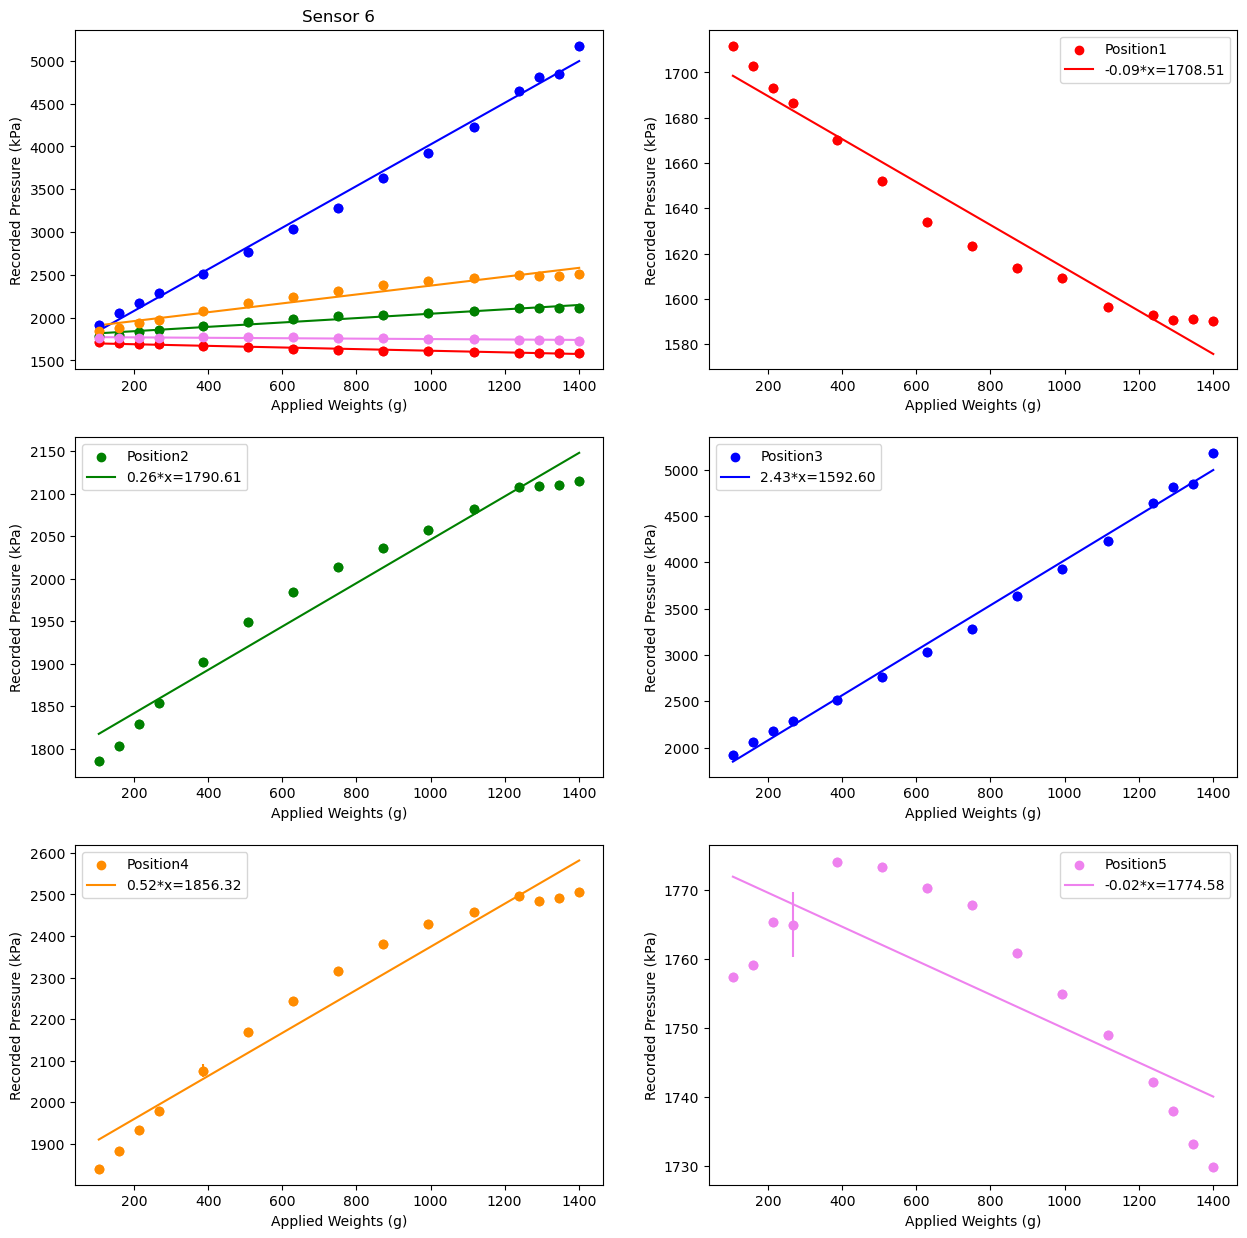

In [202]:
plottingplans6 = [s6p1,s6p2,s6p3,s6p4,s6p5]
stdev6 = [stds6p1,stds6p2,stds6p3,stds6p4,stds6p5]
m6,b6 = makePlots(plottingplans6,stdev6,6)

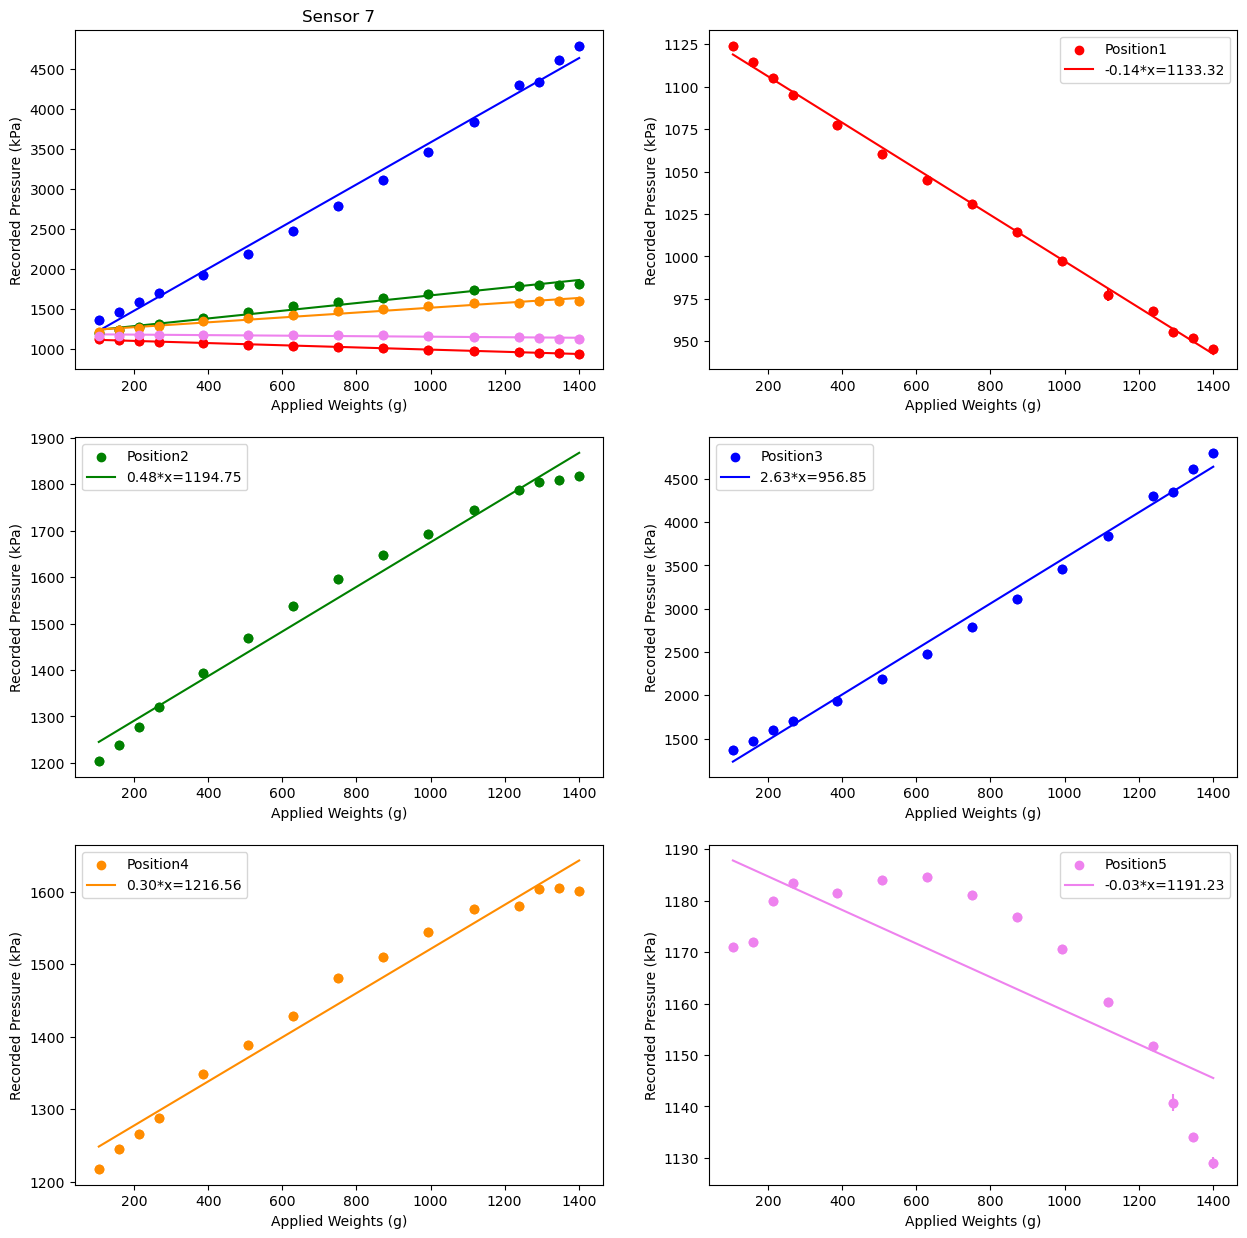

In [203]:
plottingplans7 = [s7p1,s7p2,s7p3,s7p4,s7p5]
stdev7 = [stds7p1,stds7p2,stds7p3,stds7p4,stds7p5]
m7,b7 = makePlots(plottingplans7,stdev7,7)

In [204]:
m_all = np.array([m1,m2,m3,m4,m5,m6,m7])
b_all = np.array([b1,b2,b3,b4,b5,b6,b7])

ce_m = pd.DataFrame(m_all, columns=['x1','x2','x3','x4','x5'])
ce_b = pd.DataFrame(b_all, columns=['x1','x2','x3','x4','x5'])

ce_m.to_csv('m_all.csv')
ce_b.to_csv('b_all.csv')